# Multiclass Classification of Data

Importing all necessary libraries.

Here I have used the scipy library to load the .mat file as a python processible dataframe.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline

dataset = loadmat('F:\machine-learning-ex3\ex3\ex3data1.mat')

Defining Sigmoid

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

Defining the Cost Function

In [3]:
def cost(theta, X, Y, learning_rate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    Y = np.matrix(Y)
    A = sigmoid(X * theta.T)
    first = np.multiply(-Y, np.log(A))
    second = np.multiply((1 - Y), np.log(1 - A))
    reg = (learning_rate / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / (len(X)) + reg

Optimizing the Gradient Descent

In [16]:
def gradient(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        
        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:,i])
    
    return grad

Predicting and Error checking

In [17]:
def predict_all(X, all_theta):
    rows = X.shape[0]
    params = X.shape[1]
    num_labels = all_theta.shape[0]
    
    X = np.insert(X, 0, values=np.ones(rows), axis=1)
    
    X = np.matrix(X)
    all_theta = np.matrix(all_theta)
    
    h = sigmoid(X * all_theta.T)
    
    h_argmax = np.argmax(h, axis=1)
    
    h_argmax = h_argmax + 1
    
    return h_argmax

Implementing the Model

In [58]:
X=dataset['X']
y=dataset['y']
num_labels = 10
learning_rate = 1

rows = X.shape[0]
params = X.shape[1]
    
all_theta = np.zeros((num_labels, params + 1))
    
X = np.insert(X, 0, values=np.ones(rows), axis=1)
costs = []
for i in range(1, num_labels + 1):
    theta = np.zeros(params + 1)
    y_i = np.array([1 if label == i else 0 for label in y])
    y_i = np.reshape(y_i, (rows, 1))
        
    iters = 100

    for j in range(iters):
            
        grad = gradient(theta,X, y_i, learning_rate)
        A = sigmoid(X * theta.T)
        J = ((A - y_i) ** 2).mean(axis=None)
        theta = theta - grad
        if(j%10==0):
            costs.append(J)
        
        
    all_theta[i-1,:] = theta

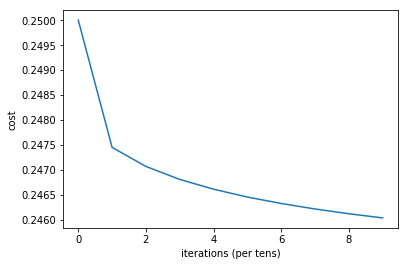

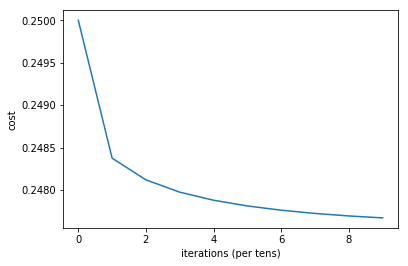

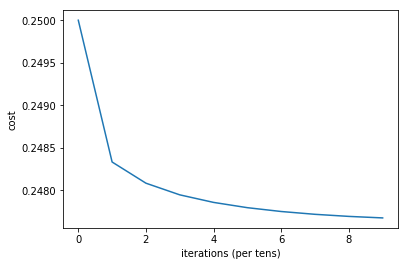

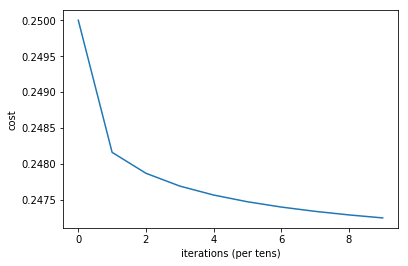

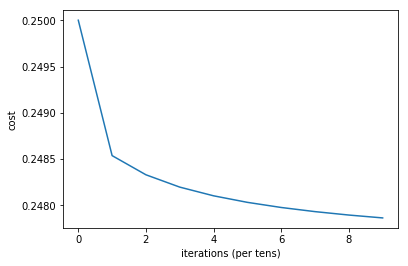

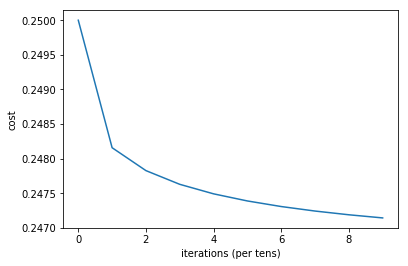

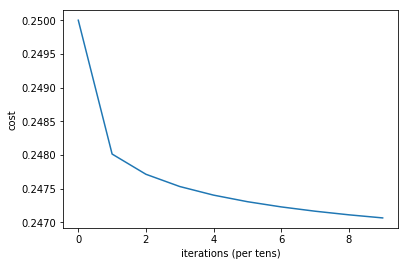

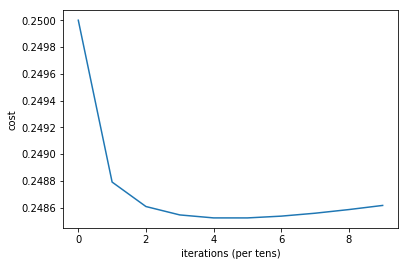

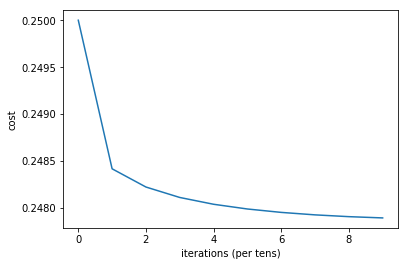

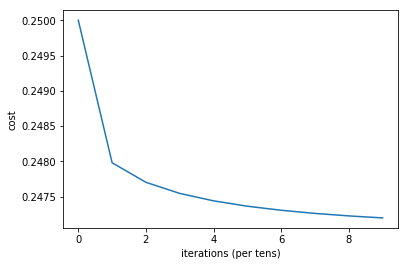

accuracy = 89.92%


In [60]:

y_pred = predict_all(dataset['X'], all_theta)
correct = [1 if a == b else 0 for (a, b) in zip(y_pred, dataset['y'])]
accuracy = (sum(map(int, correct)) / float(len(correct)))

for i in range(10):
    plt.plot(np.squeeze(costs[i*10:(i+1)*10]))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.show()

print('accuracy = ',end='')
print(accuracy * 100,end='')
print('%')